---
# **Binance Project**

---
# Executive Summary

## *Big Idea*

Predict near-future bitcoin prices.

## *Goals*

1. Use descriptive statistics to identify key price points
2. Predict future price of bitcoin

## *Key Findings*

> "The future is certain. It is just not known."
> - Johnny Rich

1. Frequency analysis revealed potential price indicators.
2. Additional modeling may be more predictive.

## *Recomendations*

1. Use descriptive statistics to indicate key price points for portfolio.
2. Explore multi-model performance.
   - i.e. SMA(15) comapared to SMA(30)

---
# The Plan

## *1. Tidy Data Analysis*

Imports used can be found in `imports.py`. (Please ensure libraries are installed for package support).

In this stage, I obtained btcusd trading pair data by querying the Binance REST API hosted at <https://api.binance.us/api/v3/klines>. 

I cleaned and prepped the data by:
  - preparing column labels.
  - setting `'close_time'` as `datetime`.
  - setting `'close_time'` as index.
  - spliting dataset into train, validate, and test.

## *2. Exploratory Data Analysis*

  I conducted an initial exploration of the data by examing relationships between each of the features and treated close price as a target. Next, I explored further using premier tools such as Pandas, Python, Statsmodels, etc..., to answer the initial questions posed above. Data exploration continues by delving into the descriptive statistics of the dataset. Further investigation includes up / down -sampling, frequency analysis, lag response, and autocorrelation. I found the frequency analysis revealed potential price indicators.

## *3. Predictive Model Analysis*

  I used data from 2022 April 26 from approximately 03:30 - 20:30 to determine if the candlestick close price, in conjuncture with the time index, could be used to determine future close prices, then modeled what the predicted values would like against the acutal values. I offer several models that attempt to predict the future price of btcusd trading pair. I used a last observed value (lov), average, 15 minute simple moving average from TAlib, and a basic Holt's linear trend. Root mean square errors (RMSE) are reported for comparison.

---
# Findings' Visualizations

Here we see the data flow to our final model.

## *Imports*

Pulls imports from `/utils/imports.py`

In [1]:
# imports.py in /utils/
from utils.imports import *

# plotting magic
%matplotlib inline
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)
# plt.style.available
# ^^^ show available seaborn styles

# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
from utils.tidy import *
from utils.model import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## *Tidy Split*

Pull a cached example of Binance btcusd data, tidied and split for exploration using `tidy.py`

In [2]:
train, validate, test = btcusd()

cached csv


## *EDA*

Exploratory data analysis of cached Binance btcusd data from `model.py`

### Full Dataset Analysis

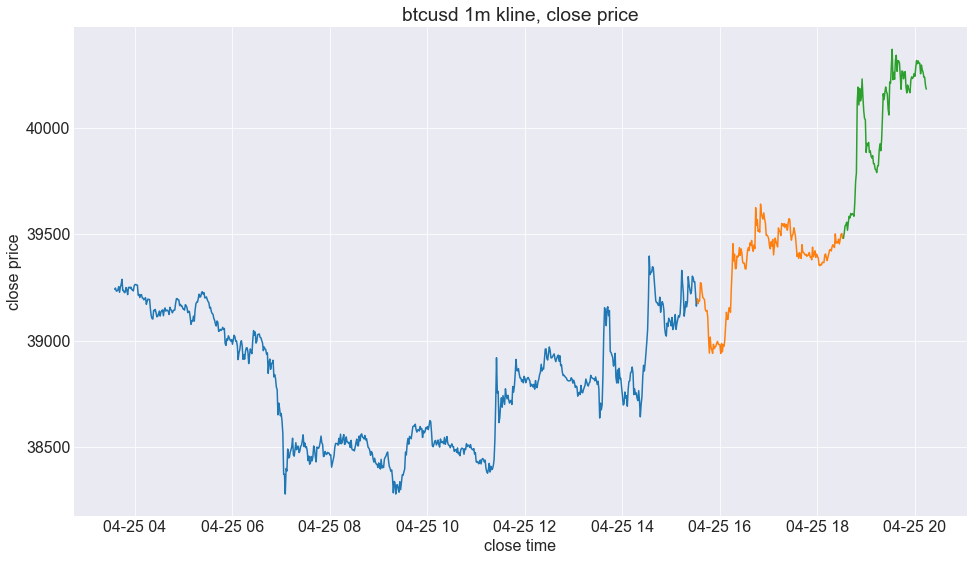

In [3]:
# plot train, validate, test split
split_plot(train,validate,test,col='close')


### Training Set Analysis
Brown line is set at the average price for the period shown. Brown dots show price change every quarter hour. 

Takeaway:
- An interesting pattern emerges when the data is resampled by quarter hour increments and compared to a quarter hour moving average.

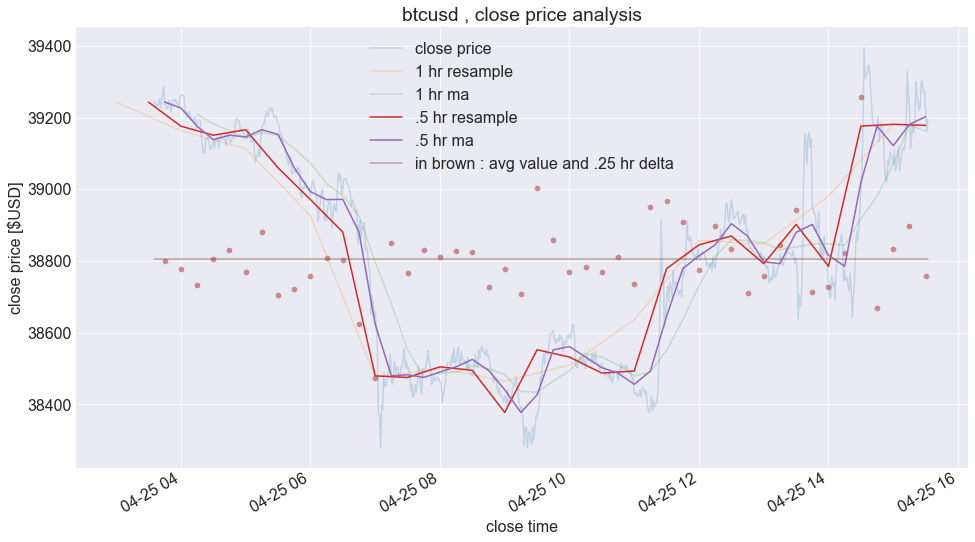

In [4]:
# explore train set for periodicity
print_btcusd(train)

### Descriptive Statistical Analysis
Descriptive statistics for the time period previously shown.

Takeaway:
- The high frequency prices indicate prospective price points.
- Values outside the box plot may define a margin spread.
- The data has a high autocorrlation for the first minute or two.

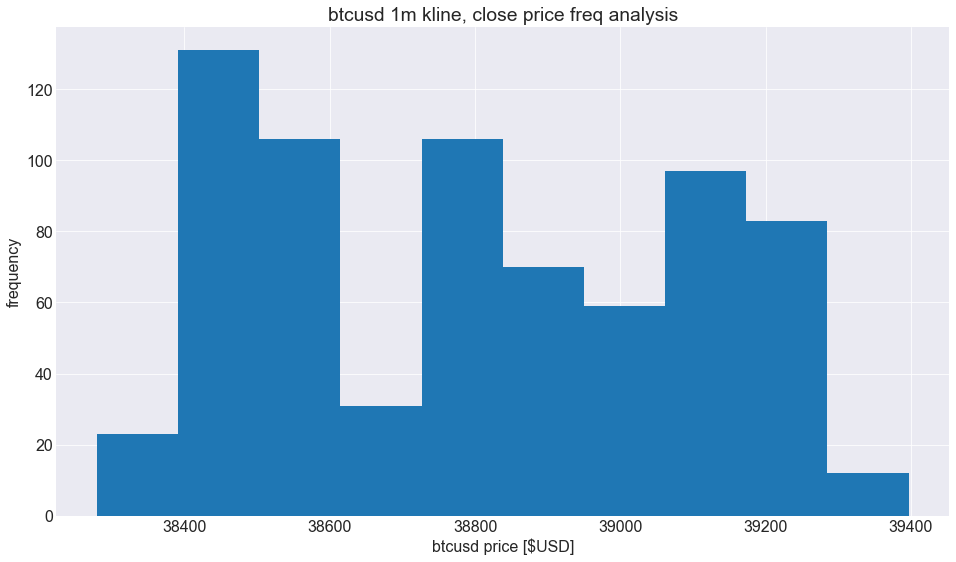

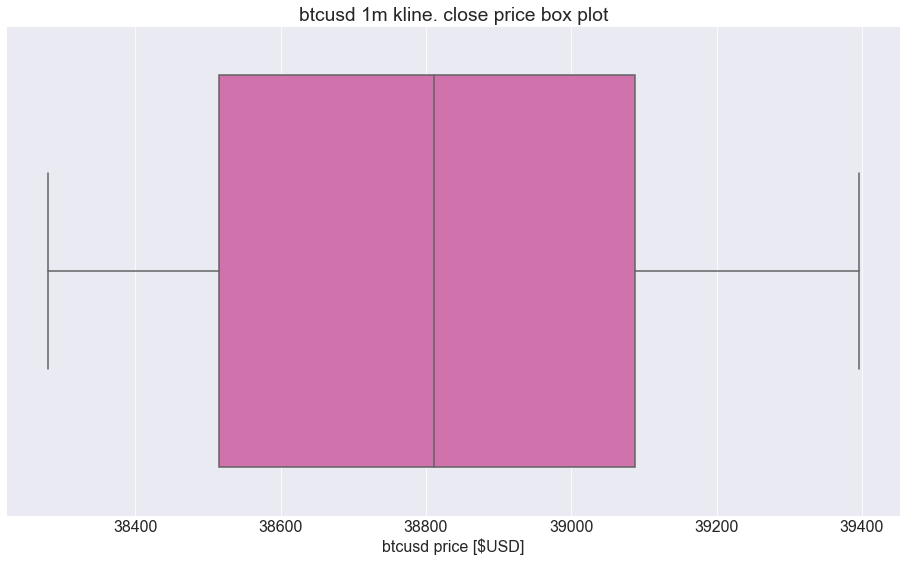

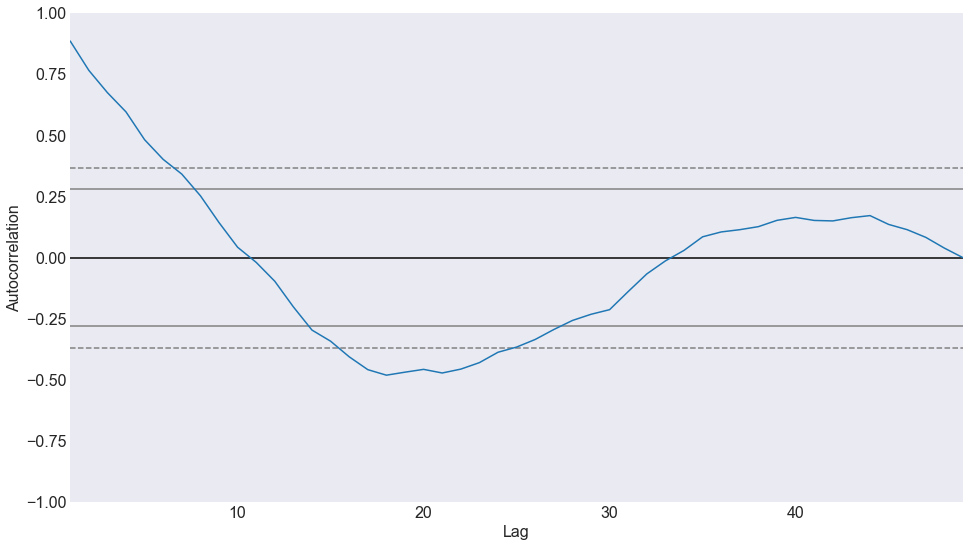

In [5]:
d_stats_btcusd(train)

---
# Recommendation

Based on the information shown in the previous section, I recommend the following courses of action:
1. use location of high frequency close prices to indicate buy / sell conditions.
2. use box plot min / max values to indicate margin conditions.


---
# "What If... " Visualizations

Here's what it might look like if predicting future prices of bitcoin was easier.

## *Predictive Modeling*

The graph below shows the results of the following models:
- last observed value
- average of the training set
- a quarter hour simple moving average (compliments TAlib)
- a simple Holt's linear trend.

All models are shown against the values from the validate set, which they were intended to predict.

Takeaway:
- Simple moving average was best at reducing RMSE.
- Holt's linear trend somewhat predicted the slope of the actual graph for about an hour!

/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


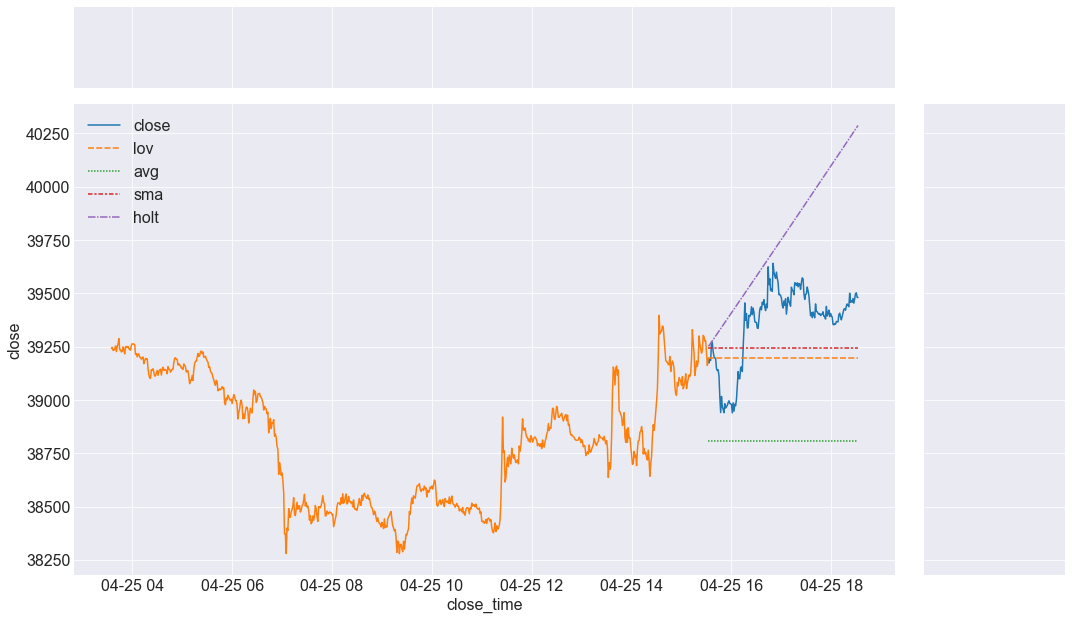

In [6]:
yhat_df=yhat_model(train,validate)

## *RMSE Analysis*

Root mean square error analysis for the models shown above. The simple moving average has the lowest error rate when predicting future prices of bitcoin. This, however, does not correlate to financially sound trading principles.

skipping close
lov
avg
sma
holt


,lov,avg,sma,holt
0,242.149605,581.652564,213.179082,468.632256


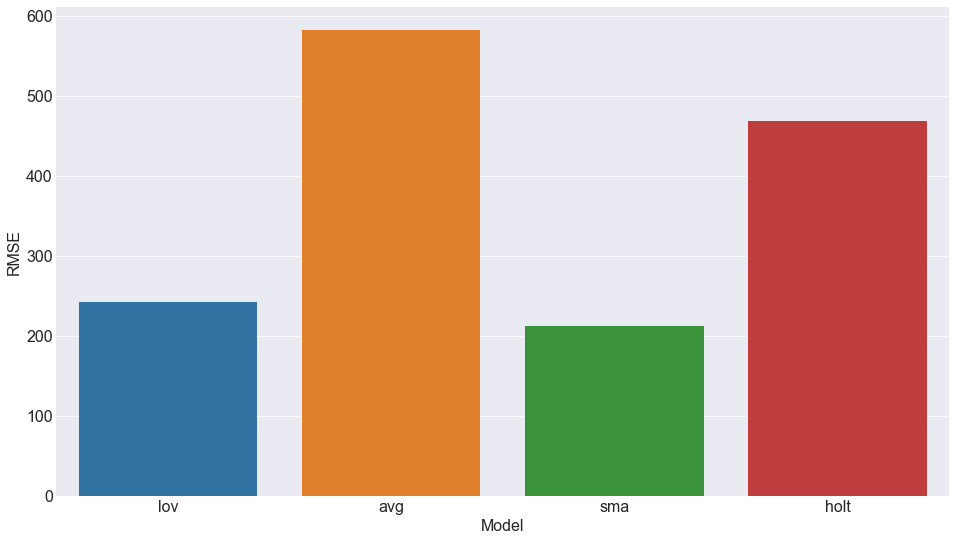

In [7]:
rmse_model(yhat_df)

---
# Conclusion

I found it difficult to predict the future prices of bitcoin. My best model, the simple moving average, had no retail value for indicating trade flags.

While one model alone was not effective at predicting future values, there may be a pattern of multiple models, that could at least recognize trade flags, if not predict them altogether.

I believe the behavior of the descriptive statistics exemplified valid trading indicators. The resulting indicators could be used as part of an automated trading strategy.

Lastly, DO NOT use the models in this project to make trade decisions. The predictions in this project are wildly inaccurate compared to the behavior of the actual bitcoin market.

---
# Next Steps
Tune back in soon to see:

1. Results from Facebook's "Prophet" model added for comparison.
2. Full candlestick data (high, low, open, close, volume) plugged into a clustering model. (Sneak peak below:))
3. Current models used on test dataset.
4. A combination of differnt models used to predict prices.

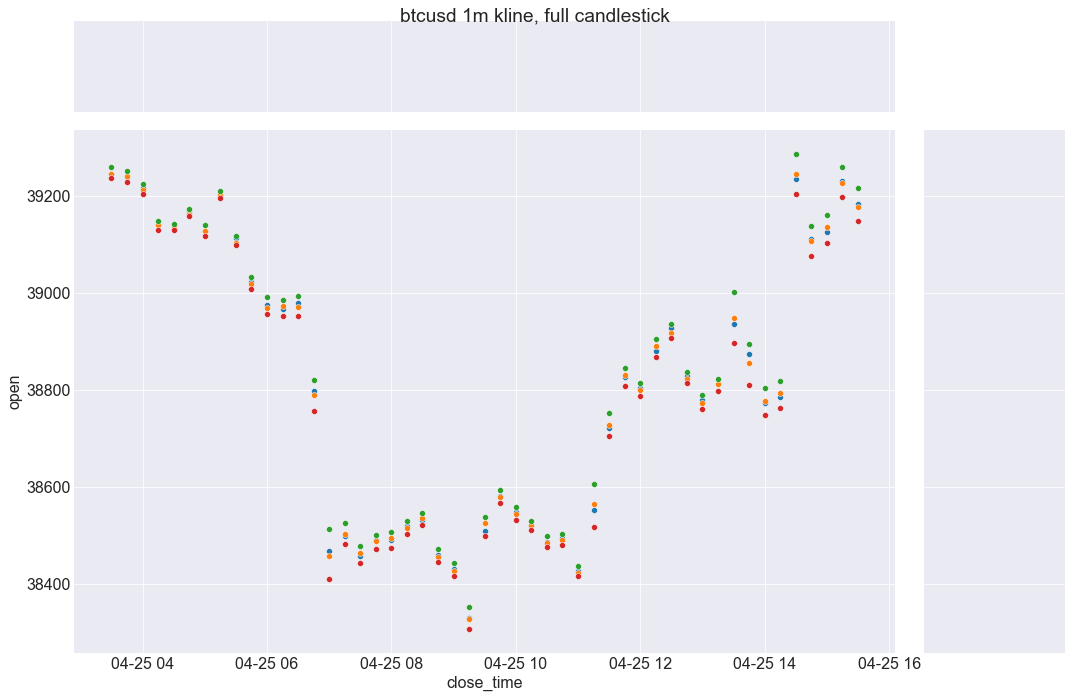

In [8]:
trap_btcusd(train)

---
# Appendix

## *Data Dictionary*

Definitions for historical K-line data pulled from Binance API.
Variables | Definition
--- | ---
Open time | time candlestick opened
Open | price at open
High | highest price during 1 minute interval
Low | highest price during 1 minute interval
Close | price at close
Volume | number of $USD traded during 1 minute interval
Close time | time candlestick closed
Quote asset volume | n/a
Number of trades | n/a
Taker buy base asset volume | n/a
Taker buy quote asset volume | n/a
Ignore | n/a

## *Example Data Entry*

```text
1499040000000,      // Open time
"0.00386200",       // Open
"0.00386200",       // High
"0.00386200",       // Low
"0.00386200",       // Close
"0.47000000",  // Volume
1499644799999,      // Close time
"0.00181514",    // Quote asset volume
1,                // Number of trades
"0.47000000",    // Taker buy base asset volume
"0.00181514",      // Taker buy quote asset volume
"0" // Ignore.

```
